機械学習で用いる数学について、Pythonを使って学びましょう。
基礎的なものは中学や高校で学んだ内容です。
復習をしながらPythonではどのように扱うのかを身につけましょう。


## 利用するライブラリの読み込み

Python標準ライブラリおよびJupyterHub環境（`hub-scipy-notebook`を想定）で導入済みのライブラリを使用します。ここで扱う数学的な処理は標準ライブラリの`math`と数値計算、多次元配列を扱うライブラリである`NumPy`です。どちらも同様の機能を提供します。


In [1]:
# 利用するライブラリを読み込む
# as で別名をつけることができる（長いライブラリ名を省略）
import math # 数学演算のための標準ライブラリ
import matplotlib.pyplot as plt # グラフ作成用
import japanize_matplotlib # matplotlibの日本語化
import numpy as np # 数値計算用

## 変数・定数・関数

![変数・定数・関数の関係](https://github.com/uribo/exeai/raw/8470788015c29a18b0a312308bb84d61d8ee59ab/img/slide03_function.jpeg)

- 変数: さまざまな値を取り得る値
- 定数: 決められた値
- 関数: 入力と出力の関係性を表す数式。入力$x$が決まると出力$y$の値も決まる、一対一の関係。

消費税率10%の店で100円のトマトを3個買うとき...


In [2]:
TOMATO_PRICE = 100
TAX = 10
n = 3

print("金額: ", (TOMATO_PRICE + (TOMATO_PRICE/TAX)) * n, "円")

金額:  330.0 円


同じ店で同じトマトを5個買うとき...


In [3]:
n = 5

print("金額: ", (TOMATO_PRICE + (TOMATO_PRICE/TAX)) * n, "円")

金額:  550.0 円


変わらないのはトマトの価格と消費税率（`TOMATO_PRICE`と`TAX`）... 定数[^1]

変わったのはトマトの個数 ... 変数

[^1]: Pythonでは変数と定数を明確に区分する仕組みはありません。Pythonコミュニティにおけるコードの記述ルールをまとめたコーディング規約であるPEP 8では定数の名前は大文字で書き、単語をアンダースコアで区切ることが[明記されています](https://pep8-ja.readthedocs.io/ja/latest/#section-33)。

これらの定数と変数の関係を関数にまとめてみましょう。
Pythonでは関数の定義を`def`文を使って行います。


In [4]:
# 1個100円で消費税率10%の商品に対して、
# 個数に応じていくらになるかを求める関数
def fn_tomato(n = 1):
  PRICE = 100
  TAX = 0.1
  price_in_tax = PRICE + PRICE * TAX
  # returnで関数の戻り値を指定
  # return 文を省略すると関数は None を返す
  return price_in_tax * n

In [5]:
print("金額: ", fn_tomato(3), "円") # 3個
print("金額: ", fn_tomato(5), "円") # 5個

金額:  330.0 円
金額:  550.0 円


関数を用いることで、定数の記述を省略し、変数だけを変更した計算が容易に行えるようになりました。このように関数では、関連のある一連の処理をまとめて再利用することができて便利です。また、コードに問題が生じたときも関数の部分に注目して修正を行える利点があります。

## 一次関数

一次関数$y=ax+b$について考えます。この一次関数では2つの定数$a$と$b$が存在し、それぞれ傾きと切片として機能します。

ここで、定数が異なる一次関数がどのようにグラフ上で変化するか確認しましょう。変数である$x$にはNumPyの`linspace()`関数により生成した隣接する項との差が一定の等差数列を与えます。


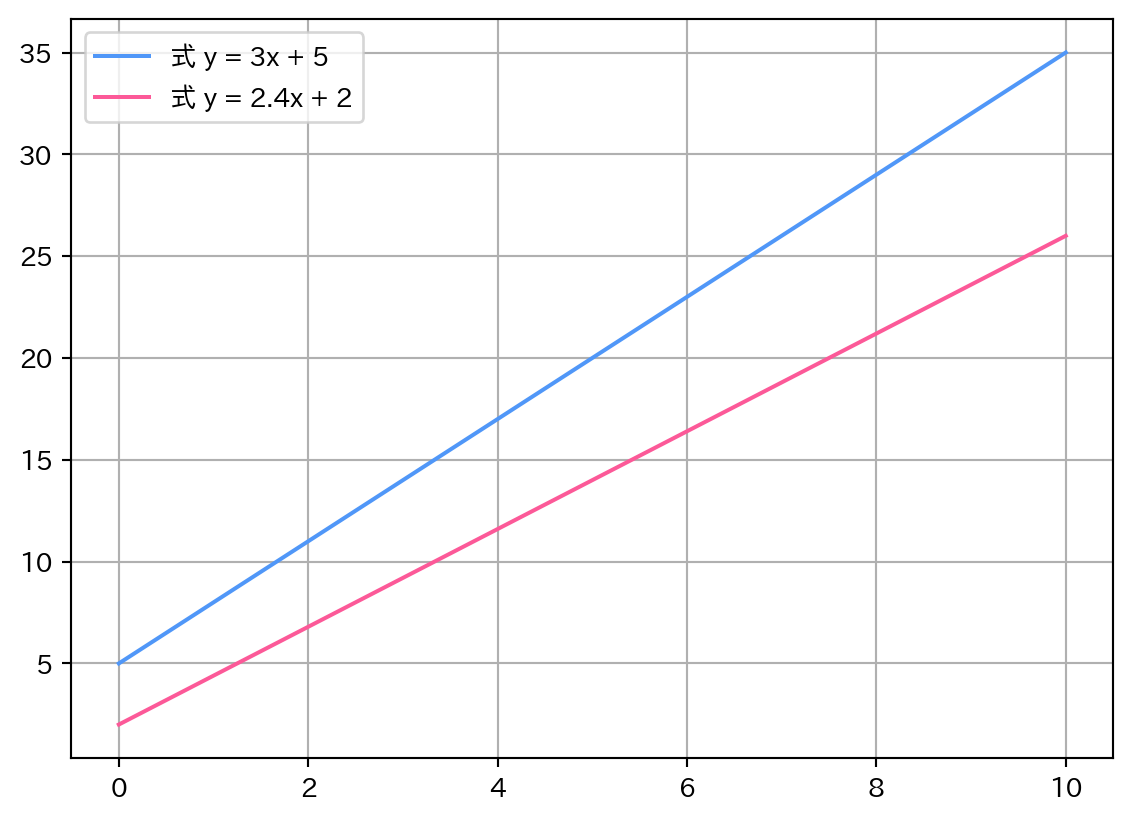

In [6]:
# 2つの一次関数によるグラフを作成する
x = np.linspace(0, 10, 5) # 0から10までの公差が2.5の等差数列を生成

# 定数が異なる一次関数に変数を当てはめてyの値を得る
y1 = 3 * x + 5
y2 = 2.4 * x + 2

# xとyの関係をグラフに描画
plt.grid(True)
plt.plot(x, y1, label="式 y = 3x + 5", color="#5097F8")
plt.plot(x, y2, label="式 y = 2.4x + 2", color="#fc5998")
plt.legend(loc="upper left")
plt.show()

一次関数のグラフは直線を描きます。異なる定数からなる一次関数のグラフは、異なる直線になっていることがわかります。

機械学習・深層学習では、このような関数の出力に影響を及ぼす「重み」を変数として学習し、未知のデータに対しては定数として「重み」を利用します。特に深層学習では複数の中間層が「重み」をもつことになり、より柔軟な表現力を得ることがモデルの性能向上に貢献しています。


In [7]:
#| include: false
plt.close()

## 平方根

平方根は`math`、`NumPy`で利用方法が異なります。
それぞれのライブラリでの平方根の使い方をみましょう。

$\sqrt{2}$


In [8]:
math.sqrt(2)

np.sqrt(2)

1.4142135623730951

$\sqrt{3}$


In [9]:
math.sqrt(3)

np.sqrt(3)

1.7320508075688772

In [10]:
#| eval: false
#| echo: true
# 問題: 「富士山麓オウム鳴く」となる整数は？
x = x
np.sqrt(x)

## 累乗

- `**`演算子
- mathライブラリの`pow()`関数
- numpyライブラリの`power()`関数


In [11]:
base = 3 # 底
exponent = 2 # 指数

In [12]:
base**exponent

9

In [13]:
math.pow(base, exponent)

9.0

In [14]:
np.power(base, exponent)

9

## 指数関数と対数関数

### 指数関数

指数関数... 指数を変数とした関数


In [15]:
# 引数として与えられた数値の指数関数の値を返す
# e^2
# eは自然対数の底。およそ2.71828
np.exp(2)

# np.power()で同じ値が得られることを確認
# np.power(2.71828, 2)

7.38905609893065

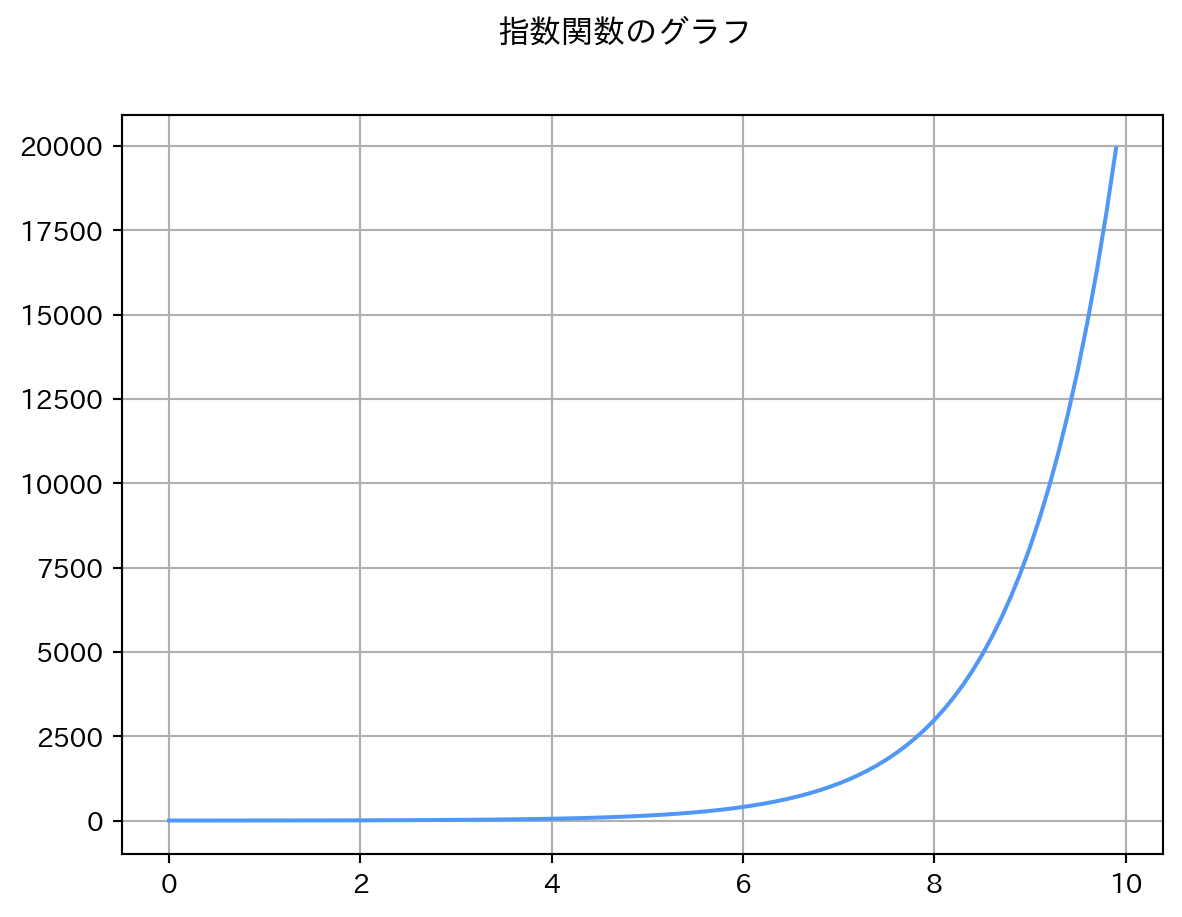

In [16]:
# 0から10まで0.1刻みの配列を生成
x = np.arange(0, 10, 0.1)

y = np.exp(x)

plt.suptitle("指数関数のグラフ")
plt.plot(x, y, color = "#5097F8")
plt.grid(True)

plt.show()

In [17]:
#| include: false
plt.close()

### 対数関数


In [18]:
x = np.exp(2)
np.log(x)

2.0

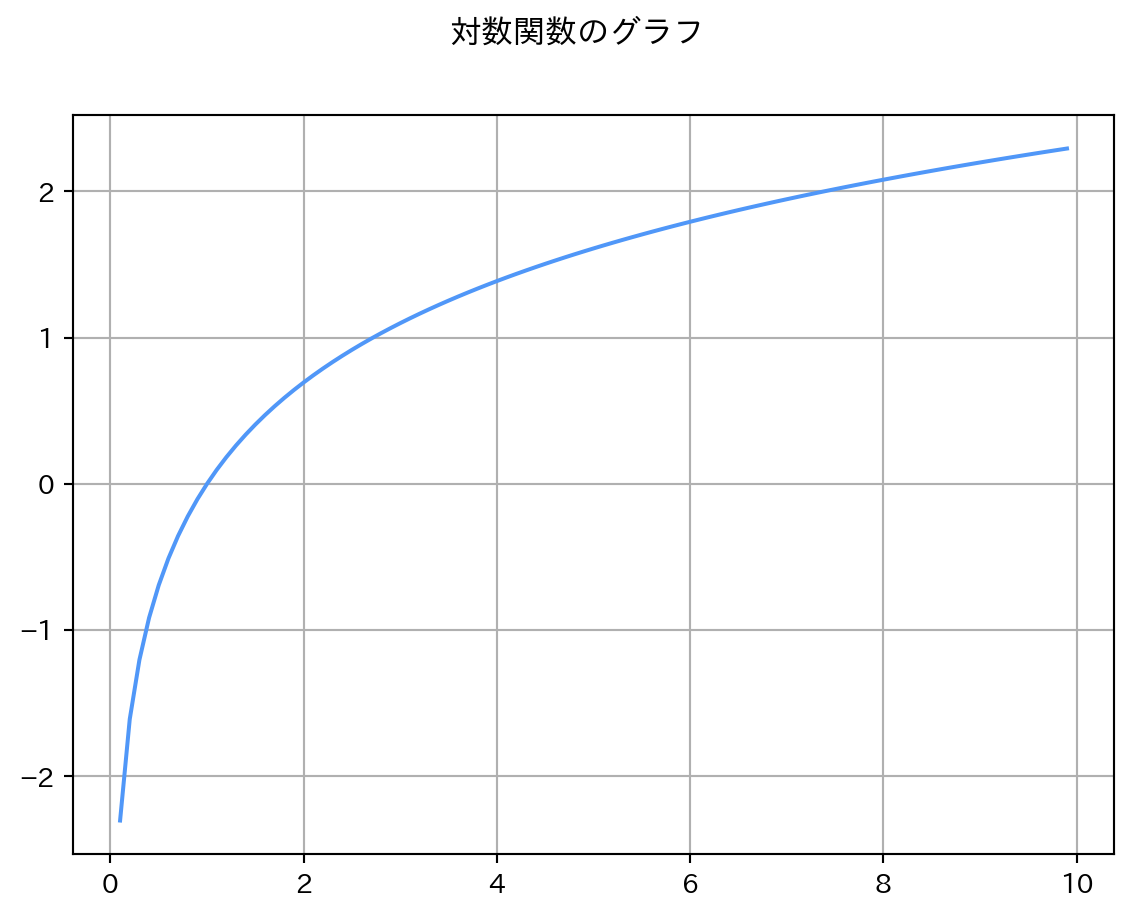

In [19]:
# 0.1から10まで0.1刻みの配列を生成
x = np.arange(0.1, 10, 0.1)

y = np.log(x)

plt.suptitle("対数関数のグラフ")
plt.plot(x, y, color = "#5097F8")
plt.grid(True)

plt.show()

常用対数


In [20]:
np.log10(10)

1.0

## ベクトル

リストは行ベクトルとして機能します。ただしベクトル同士の演算を行うことは難しいです。


In [21]:
vector = [1, 2, 3, 4, 5]
print(vector)

[1, 2, 3, 4, 5]


そのためベクトル演算を実現するにはNumPyの`array()`関数を利用する方法が簡単です。なおの`array()`関数では厳密に行ベクトルまたは列ベクトルを区別せずに1次元配列を表現するために使用されます。


In [22]:
vector = np.array([1, 2, 3, 4, 5])

In [23]:
# ベクトルの和
vector + vector

array([ 2,  4,  6,  8, 10])

In [24]:
# ベクトルの差
vector - np.array([0, 2, 4, 1, 1])

array([ 1,  0, -1,  3,  4])

In [25]:
# リストによるベクトルでは+演算子を使ったベクトルの和の計算が行えない
[1, 2, 3, 4, 5]+[1, 2, 3, 4, 5]

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

ベクトルの和は同じ成分の数からなるベクトル同士でないと計算できません。


In [26]:
#| error: true
vector2 = np.array([6, 7])

vector + vector2

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

NumPyでベクトルの要素数を知る方法は、`numpy.array`オブジェクトのsize属性を使用する、`len()`関数を用いるなどがあります。


In [27]:
# numpy.arrayの要素数を確認
vector.size

np.size(vector)
np.size(vector2)

len(vector)

5

### ベクトルの内積: 同一次元のベクトル同士のかけ算


In [28]:
# ベクトル u と v を定義
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# NumPyのdot関数を使って内積を計算
inner_product = np.dot(u, v)

print("内積:", inner_product)

内積: 32


In [29]:
# 検算
(1 * 4) + (2 * 5) + (3 * 6)

32

内積は次元の等しいベクトル同士でないと求められません。


In [30]:
#| error: true
np.dot(u, np.array([3, 2]))

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

## 行列

行列の表現もNumPyを使うと演算（行列の加算、減算、乗算、転置、逆行列）が簡単に行えるようになります。


In [31]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 行列の転置


In [32]:
# 行列の縦と横を入れ替える
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])